In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import re
from pprint import pp

In [62]:
def lp2p(p):
    return np.exp(p)*100

def p2lp(p):
    return np.log(p / 100)

In [63]:
haz_dict = {
    "Biological": {
        "Aggressive Animals": "Allergies, Bites, Scratches, Kicks, Disease\n",
        "Bacterial & Viral": "Food (Gastro-Intestinal Infections), Air (Cold/Flu) & Water Borne (Legionella), Human/Animal Waste - Gastro-Intestinal Infections (Guano)\n",
        "Decomposing Wildlife": "Disease spread (fleas & ticks)\n",
        "Fungal Spores": "Mouldy Building Materials, Decaying Vegetable Matter, Rotting Waste Material\n"
    },
    "Chemical": {
        "Airborne Particles": "Dust, Fumes, Vapour, Inhalation of fibres (asbestos), Hydrogen Sulphide\n",
        "Asphyxiation": "Nitrogen, Benzene, Halon, Argon, Oxygen Deficiency (Confined Space Work)\n",
        "Carcinogen": "Asbestos, Oil, Condensate Vapour, Benzene\n",
        "Discharge from Vessels": "Land, Sea, Air\n",
        "Flammable": "Flashpoint\n",
        "Hazardous Substance": "Benzene, Nitrogen\n",
        "Irritant": "Mineral Fibre (Rockwool), Acid, Caustic\n",
        "Toxic": "Mercury, Chlorine, Hydrogen Sulphide (H2S)\n"
    },
    "Electrical": {
        "Electrical Arching": "High Current\n",
        "Electrical Spark": "Equipment Condition,\u00a0EX Equipment\n",
        "Equipment": "Cables, High/Low Voltage, Non-IS Equipment, Non-standard Modifications\n",
        "Portable Tools": "Serviceability / Maintenance Level\n",
        "Static": "Equipment Condition\n",
        "Stored/Induced Electrical Charge": "Uninterrupted Power Supply\n"
    },
    "Environment": {
        "Emissions": "Unauthorised Emissions\n",
        "Light & Noise Pollution": "Local Community Impact, Light Positioning\n",
        "Spills": "Oil and/or Chemical to Deck, Sea or Land, Slips\n",
        "Waste": "NORM, General Waste, Contaminated Material, Segregation, Authorisation\n"
    },
    "Gravity": {
        "Dropped Object/Potential Dropped Object": "Deflection, Sliding, Bouncing, Lift Equipment Failure,\u00a0Collapse, Stored Energy,\u00a0Structural Failure\n",
        "Falling Person": "Suspension Trauma, Safety Equipment Failure, Collapse\n",
        "Overloading": "Shearing, Load Bearing Equipment Failure\n",
        "Snagging Equipment": "Sharp Edges, Protection Failure\n"
    },
    "Human Factors": {
        "Competence Levels": "Knowledge, Aptitude, Training, Experience, New/ Unfamiliar Equipment\n",
        "Design": "Legibility, Confusing Signs/ Indications, Complexity\n",
        "Ergonomics": "Body Positioning (Muscular Fatigue), Task Duration, Rests, Equipment, Manual Handling\n",
        "Human Error Potential": "Time Pressure, Milestone Achievement, Job Security, Tiredness, Ill-Health\n",
        "Individual Capability": "Young Persons, Pregnant or Nursing Women, Physical and Mental Health\n",
        "Lone Working": "Communication, Equipment Use, Manual Handling, Emergency Notification\n",
        "Roles & Responsibilities": "Unclear Procedures, Lack of Information, Conflicting Roles\n",
        "Task": "Repetitive, Duration, Attention Required,\u00a0Safety Critical\n",
        "Working Environment": "Temperature, Humidity, Ventilation, Light, Posture, Space, Weather\n",
        "Working Hours": "Long Hours, Routine/ Repetitive Work, Fatigue, Prolonged Concentration\n"
    },
    "Major Accident Hazards": {
        "Chemical or Dangerous Substance Release": "Uncontrolled release hazardous substances, e.g. H2S or chlorine\n",
        "Collision with Installation": "Ship or aircraft\n",
        "Dropped Object": "Large dropped or swinging object\n",
        "Explosion": "Uncontrolled hydrocarbon release, Uncontrolled release of pressure, unnecessary scaffolding in hydrocarbon-containing areas\n",
        "Failure or Breach of Safety & Environmental Critical Element (SECE)": "E.G. TR integrity compromised (open or damaged door on TR), EER (damaged lifeboat and escape equipment), dive support, shutdown system failure, fire and gas system failure, scaffold blocking F&G heads, loss of dynamic positioning\n",
        "Fire": "Uncontrolled hydrocarbon release with source of ignition, Hot surfaces, Hot work, Non-Ex or faulty Ex equipment, Galley or laundry fire\n",
        "Hydrocarbon Release": "Release from cargo tanks or vessels, leaking flange or pipework or damaged small-bore tubing\n",
        "Loss of Buoyancy / Stability": "Ballasting system failures, Loading and stability errors, Loss of water tight integrity (tank, hull piping failure), Compartment flooding\n",
        "Loss of Mechanical Integrity": "Overloading of lifting equipment or load bearing members, Excessive vibration, Excessive corrosion, Anything else with the potential to cause collapse or weakened integrity\n",
        "Loss of Well Control": "Uncontrolled flow from well bore or annulus, Leak from flexible hoses or small-bore tubing, Failure of any well barrier (mud over-balance, BP, Xmas Tree)\n",
        "Major Environmental Spill to Sea": "Leakage of oil or chemicals from pipework, vessels or machinery\n",
        "Structural Impairment": "Strucutural integrity of system or asset compromised through mechanical damage (large dropped or swinging objects, vibration) or corrosion (walkways, handrails, gratings)\n"
    },
    "Mechanical": {
        "Equipment Failure": "Jacking Equipment, Hand Tools, Doors, Hatches, Gratings, Brackets\n",
        "Mechanical Handling Equipment": "Trolleys, Stands, Surfaces, Weight of Load, Load Route\n",
        "Rotating Equipment": "Serviceability / Maintenance Level\n",
        "Stored Mechanical Energy": "Compressed Springs\n"
    },
    "Motion": {
        "Access & Egress": "Congestion, Confined Space, Restricted Movement, Entrapment\n",
        "Collision Impact": "Sharp or Abrasive Object, Trapping, Stored Energy\n",
        "Discharges": "Exhausts, Pipes\n",
        "Friction": "Lubricants\n",
        "Rotating Equipment": "Projectiles, Snagging\n",
        "Slips, Trips and Falls": "Hoses, Pipes, Valves, Stairs, Steps, Excavations\n",
        "Transport": "Aircraft,\u00a0Vessels, Vehicles (Forklifts), ROVs\n",
        "Vibration": "HAVS,\u00a0Erosion\n"
    },
    "Pressure": {
        "Equipment Failure": "Hoses, Small Bore Tubing, Pipework, Air Tools, Valves, Wireline\n",
        "HP/LP Interfaces": "Pressure Regulation\n",
        "Pressurised Systems": "Gas, Compressed Air, Fluid, Trapped Pressure, Bottled Gases, Projectiles, Hoses\n",
        "Release of Pressure": "Over Pressurisation, Pressure Line Release (Whip Checks)\n",
        "Trapped Pressure": "Hydrates, Deflections\n",
        "Vacuum": "Pressure Difference\n"
    },
    "Radiation": {
        "Electronic Magnetic Radiation": "HV Cables, Switch Rooms\n",
        "Ionising Radioactive Sources": "Nucleonics\n",
        "Lasers": "Positioning (Eye Damage)\n",
        "Microwave & Radiowave": "Line of Sight Dishes\n",
        "NORM": "Pipes, Vessels, Valves - Inhalation, Ingestion\n",
        "UV & IR Radiation": "Arc welding, Sunlight/Welding (Skin Burning), Heat Sources (Eye Damage)\n",
        "X-Ray": "Positioning (Radiation Exposure)\n"
    },
    "Safety Systems": {
        "Area Zone Classification Breach": "Explosive Atmospheres\u00a0(ATEX) Zone (1, 2, 3 or 20, 21, 22)\n",
        "Safety & Environmentally Critical Element (SECE) Impairment": "Communication Equipment, Escape Arrangements, Active Fire Protection, Hydrocarbon Containment, Blowdown or Relief Systems, Drains & Vents, Emergency Power & Lighting, Emergency Shutdown Systems, HVAC, Navigational Aids, PFP, Well Control Equipment, TR, Dynamic Positioning, F&G Detection Systems, Asset Integrity, Diving Systems, Critical Instrumentation\n"
    },
    "Sound": {
        "Excessive Noise": "Loss of/ Limited Communication, Long Term Health Effects, Noise Pollution, High or Low Frequency\n",
        "Vibration": "Hand Arm Vibration (HAVS), Duration of Hand Tool Use\n"
    },
    "Temperature": {
        "Cold Surface": "Nitrogen Operations, Cold Liquid, Ice\n",
        "Explosion": "Pyrotechnics, Non IS Equipment, Explosives, Pyrophoric Scale, Ignition Source\n",
        "Fire": "Naked Flame, Heat Transfer\n",
        "Hot Liquid": "Oil, Chemical, Flash Point, Flammable Atmosphere\n",
        "Hot Surface": "Heat Transfer\n",
        "Spontaneous Combustion": "Pyrophoric Scale\n"
    }
}

In [64]:
df = pd.read_csv('Data\logprobs_GD_002_boosted_2024-07-24.csv')

entity = 'hazard'
lp = df[f'logprobs_{entity}']
df.loc[1].observation

'During preparation works to change the supply for the accommodation services switch board it was noted that the TR AHU would need to be configured to recirc mode due to the loss of extract fan supplies. A conversation took place regarding the effects this may have with COVID 19 procedures and the recycling of air within the accommodation and the job was stopped until an investigation could be completed.'

In [65]:
pp(ast.literal_eval(df.iloc[9].logprobs_hazard))

{'{\n': {'logprob': -0.068122804,
         'top_logprobs': [['{\n', -0.068122804],
                          ['{"', -2.7237854],
                          ['\n', -8.422371]]},
 ' ': {'logprob': -0.00013691289,
       'top_logprobs': [[' ', -0.00013691289],
                        ['  ', -9.460367],
                        ['   ', -9.961601]]},
 ' "': {'logprob': -1.2664457e-06,
        'top_logprobs': [[' "', -1.2664457e-06],
                         [' ', -13.758958],
                         [' {\n', -17.179201]]},
 'h': {'logprob': -5.5122365e-07,
       'top_logprobs': [['h', -5.5122365e-07],
                        ['H', -15.50422],
                        ['s', -16.493444]]},
 'azard': {'logprob': -1.640531e-05,
           'top_logprobs': [['azard', -1.640531e-05],
                            ['az', -11.0244875],
                            ['azar', -16.269701]]},
 '":': {'logprob': -0.00025299523,
        'top_logprobs': [['":', -0.00025299523],
                         ['":["',

In [66]:
x = lp.loc[1]
x = ast.literal_eval(x)
pp(x)


{'{\n': {'logprob': -0.14453624,
         'top_logprobs': [['{\n', -0.14453624],
                          ['{"', -2.0086873],
                          ['\n', -7.818734]]},
 ' ': {'logprob': -0.00013989297,
       'top_logprobs': [[' ', -0.00013989297],
                        ['  ', -9.344167],
                        ['   ', -10.273442]]},
 ' "': {'logprob': -3.1281633e-07,
        'top_logprobs': [[' "', -3.1281633e-07],
                         [' ', -15.171455],
                         ['\t', -17.900482]]},
 'h': {'logprob': 0.0,
       'top_logprobs': [['h', 0.0], ['H', -18.062634], [' h', -20.060133]]},
 'azard': {'logprob': -7.822647e-06,
           'top_logprobs': [['azard', -7.822647e-06],
                            ['az', -11.7715],
                            ['azar', -16.706858]]},
 '":': {'logprob': -0.00025907462,
        'top_logprobs': [['":', -0.00025907462],
                         ['":["', -8.271149],
                         ['":[', -13.097107]]},
 ' [\n': {'lo

In [67]:
res = []

for d in lp:
    av = 0
    d = ast.literal_eval(d)
    for value in d.values():
        if not isinstance(value, dict):
            continue
        else:
            av += lp2p(value['logprob'])
    av /= len(d)
    res.append(av)


In [68]:
low_values = [x for x in res if x < 10]
print(low_values)

[0.0]


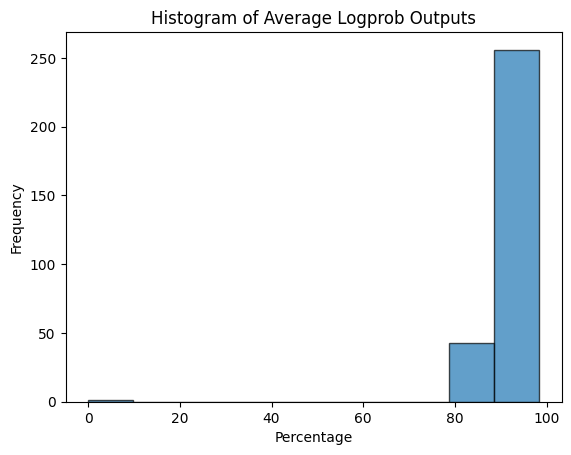

In [69]:
def lp_hist(res, title = 'Histogram of Average Logprob Outputs'):
    plt.hist(res, bins=10, edgecolor='black', alpha=0.7)

    # Add titles and labels
    plt.title(title)
    plt.xlabel('Percentage')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

lp_hist(res)

In [70]:
square_brackets_pattern = re.compile(r'[\[\]:]')
braces_pattern = re.compile(r'[\{\}:]')
category_name_pattern = re.compile(r'hazard:', re.IGNORECASE)
newline_pattern = re.compile(r'\n')

# Filter function to remove unwanted tokens
def filter_tokens(token):
    # Remove square brackets
    token = square_brackets_pattern.sub('', token)
    # Remove braces
    token = braces_pattern.sub('', token)
    # Remove category name
    token = category_name_pattern.sub('', token)
    # Remove new line markers
    token = newline_pattern.sub('', token)
    return token.strip()  # Remove any leading or trailing whitespace

In [71]:
t = {}

flag = False
output = {}
for key, value in x.items():
    if ']' in key:
        flag = False
    if flag:
        output[key] = value['logprob']
    if '[' in key:
        flag = True


pp(output)

{'   ': -7.77952e-05,
 'Bi': -0.0045865346,
 'ological': -1.3856493e-06,
 '",\n': -0.0163425,
 'Safety': -0.32296818,
 ' Systems': -8.776276e-06,
 '"\n': -0.07585289}


In [72]:
output = {key: lp2p(value) for key, value in output.items()}
pp(output)

{'   ': 99.9922207825968,
 'Bi': 99.54239674876209,
 'ological': 99.99986143516601,
 '",\n': 98.37903141637196,
 'Safety': 72.39968915824815,
 ' Systems': 99.99912237625114,
 '"\n': 92.69525605207988}


In [73]:
res = []
output_dicts = []
flag = False

for d in lp:
    av = 0
    d = ast.literal_eval(d)
    new_dict = {}
    for key, value in d.items():
        if not isinstance(value, dict):
            continue
        else:
            if ']' in key:
                flag = False
            if flag:
                av += lp2p(value['logprob'])
                new_dict[key] = value['logprob']
            if '[' in key:
                flag = True
    av /= len(d)
    output_dicts.append(new_dict)
    res.append(av)

print(res)
pp(output_dicts[9])

[27.809358862120373, 41.43797362309225, 18.18074622555955, 37.58228699580174, 36.347338545656335, 18.179396529947294, 40.88759106677984, 27.594877994152437, 44.65280460610869, 40.08405427142086, 41.80997304610266, 31.35980752255699, 39.589811207566434, 35.30217352710378, 21.091725095866067, 14.200399385239388, 47.5288367413701, 25.579145476007458, 47.168635011826304, 45.89116601417493, 23.378073753444657, 39.12088537150631, 30.28339494283765, 29.440633034408474, 48.24881429104879, 28.669903052284152, 36.32568327552285, 32.11072248012554, 26.67344140898353, 42.562127373813524, 36.80615161824712, 37.54985987711253, 32.422510197348984, 38.68186118180135, 33.80603649913734, 39.69195068103832, 33.116169374132525, 24.47566793229366, 30.093669443461312, 33.78960396267671, 44.507815195002905, 42.860390640140935, 24.31989761032211, 28.937924537068955, 46.53412786213468, 27.446247522771632, 29.11025582088282, 18.14937599001581, 36.7357407848361, 32.706750572724516, 40.928618727954806, 37.8273911

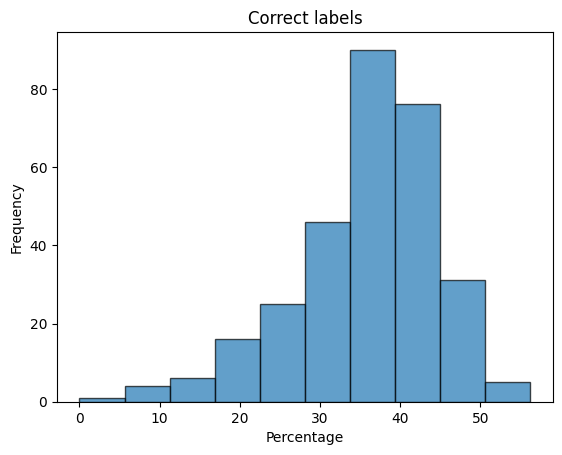

In [74]:
lp_hist(res, 'Correct labels')

In [94]:
def clean_token(token):
    # Remove any internal newline characters
    token = token.replace('\n', '')
    token = token.replace('"', '')
    return token

combined_tokens = []

for i in output_dicts:
    current_word = ''
    lp_sum = 0.0
    current_dict = {}
    for key, value in i.items():
        key = clean_token(key)
        if key.strip():
            if key.strip() != ',':
                current_word += key
                lp_sum += value
                if 'Fire' in current_word:
                    current_word = current_word.replace('Fire','')
                if current_word in haz_dict.keys():
                    current_dict[current_word] = lp_sum
                    current_word = ''
                    lp_sum = 0.0
                
    combined_tokens.append(current_dict)

In [101]:
pp(combined_tokens)

n_labels_boost = 0

for i in combined_tokens:
    n_labels_boost += len(i)


n_labels_sme = 0
for i in df['hazard']:
    i = ast.literal_eval(i)
    n_labels_sme += len(i)

print(n_labels_boost)
print(n_labels_sme)


[{'Biological': -0.0106220129813, 'Environment': -0.027604822},
 {'Biological': -0.0045879202493, 'Safety Systems': -0.322976956276},
 {'Radiation': -0.00011792203464},
 {'Chemical': -0.0018493484530000001, 'Environment': -0.0055240155},
 {'Safety Systems': -0.06847927848},
 {'Biological': -0.000266416793},
 {'Chemical': -0.06211286802, 'Safety Systems': -0.146180663444},
 {'Human Factors': -0.014997578054000002},
 {'Electrical': -0.081657790519,
  'Mechanical': -0.158177797242,
  'Gravity': -0.04373762},
 {'Environment': -0.4477928,
  'Mechanical': -0.49213845122365,
  'Safety Systems': -0.018393199702},
 {'Human Factors': -0.019791539147999998,
  'Safety Systems': -0.0026800409680000003},
 {'Environment': -0.28684187, 'Gravity': -0.24208309},
 {'Chemical': -0.030858236871399998, 'Safety Systems': -0.382752829906},
 {'Mechanical': -0.12377780622365, 'Gravity': -0.35969356},
 {'Temperature': -0.028855745, 'Environment': -0.5348819},
 {'Sound': -0.005989947},
 {'Mechanical': -0.59256450

In [96]:
corr_labels = []
inc_labels = []


for idx, row in df.iterrows():
    for key, value in combined_tokens[idx].items():
        if key.lower() in ast.literal_eval(row[f'{entity}_labels']):
            corr_labels.append((key, value))
        else:
            inc_labels.append((key, value))

In [78]:
print(corr_labels)

[('Biological', -0.0106220129813), ('Environment', -0.027604822), ('Biological', -0.0045879202493), ('Radiation', -0.00011792203464), ('Chemical', -0.0018493484530000001), ('Environment', -0.0055240155), ('Biological', -0.000266416793), ('Chemical', -0.06211286802), ('Human Factors', -0.014997578054000002), ('Electrical', -0.081657790519), ('Gravity', -0.04373762), ('Environment', -0.28684187), ('Chemical', -0.030858236871399998), ('Mechanical', -0.12377780622365), ('Temperature', -0.028855745), ('Sound', -0.005989947), ('Pressure', -0.15986149), ('Human Factors', -0.4105054303495), ('Mechanical', -0.027252720093199997), ('Human Factors', -0.076262613444), ('Radiation', -0.77196853202), ('Chemical', -0.0014254306456999999), ('Radiation', -0.00016146517), ('Mechanical', -0.0014106677273), ('Human Factors', -0.511981129906), ('Chemical', -0.11664860724199999), ('Environment', -0.15242511), ('Mechanical', -0.0012860265493), ('Environment', -0.40638152), ('Gravity', -0.064427756), ('Radiat

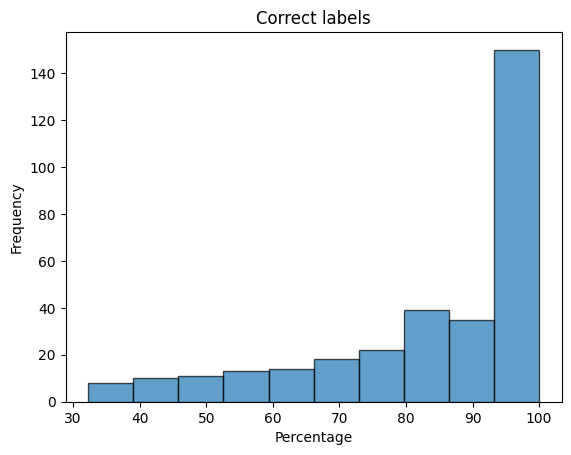

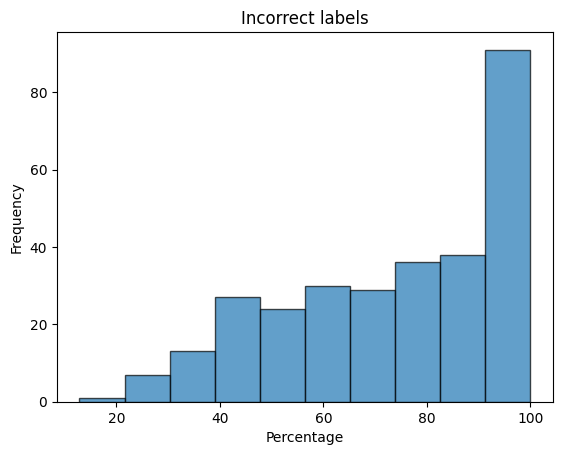

In [97]:
lp_hist([lp2p(x[1]) for x in corr_labels], 'Correct labels')
lp_hist([lp2p(x[1]) for x in inc_labels], 'Incorrect labels')

In [80]:
df['lp_average_haz'] = res
df.head()

mask_inc = df['incorrect_hazard_labels'] == '[]'
incorrect_haz = df[~mask_inc]
correct_haz = df[mask_inc]

# display(incorrect_haz)

In [81]:
mask = []

for idx, row in df.iterrows():
    print(f'Testing row {idx}')
    match = True
    i = ast.literal_eval(row['hazard_labels'])
    j = ast.literal_eval(row['hazard'])
    print(f'{i}\n{j}')
    for x in j:
        if x not in i:
            match = False
            # break
    mask.append(match)

Testing row 0
['human factors', 'biological', 'environment']
['biological', 'environment']
Testing row 1
['human factors', 'biological']
['biological', 'safety systems']
Testing row 2
['radiation']
['radiation']
Testing row 3
['chemical', 'human factors', 'safety systems', 'environment']
['chemical', 'environment']
Testing row 4
['temperature']
['safety systems']
Testing row 5
['human factors', 'biological']
['biological']
Testing row 6
['chemical', 'human factors', 'biological']
['chemical', 'safety systems']
Testing row 7
['human factors']
['human factors']
Testing row 8
['electrical', 'gravity']
['electrical', 'mechanical', 'gravity']
Testing row 9
['human factors', 'chemical']
['environment', 'mechanical', 'safety systems']
Testing row 10
['biological']
['human factors', 'safety systems']
Testing row 11
['biological', 'environment']
['environment', 'gravity']
Testing row 12
['chemical']
['chemical', 'safety systems']
Testing row 13
['mechanical']
['mechanical', 'gravity']
Testing r

In [82]:
print(mask.count(True))
df[mask][['hazard', 'hazard_labels']]

92


,hazard,hazard_labels
0,"['biological', 'environment']","['human factors', 'biological', 'environment']"
2,['radiation'],['radiation']
3,"['chemical', 'environment']","['chemical', 'human factors', 'safety systems'..."
5,['biological'],"['human factors', 'biological']"
7,['human factors'],['human factors']
...,...,...
279,"['electrical', 'human factors']","['human factors', 'electrical', 'safety systems']"
286,"['chemical', 'environment']","['chemical', 'environment']"
293,"['mechanical', 'pressure']","['pressure', 'mechanical']"
294,['human factors'],"['human factors', 'chemical']"


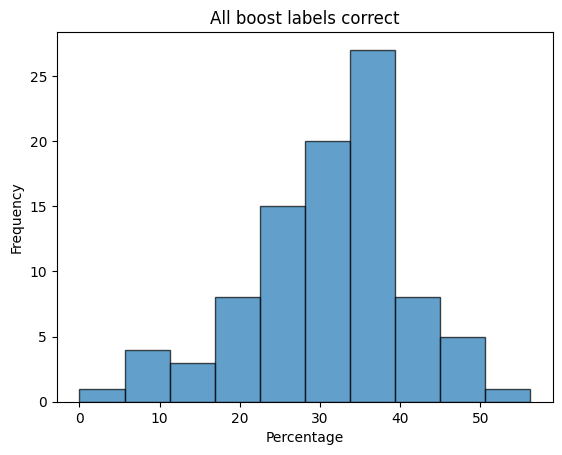

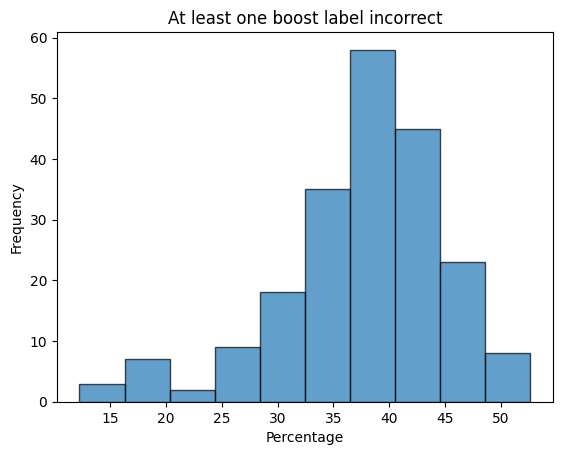

In [83]:
lp_hist(df[mask]['lp_average_haz'], 'All boost labels correct')
lp_hist(df[[not x for x in mask]]['lp_average_haz'], 'At least one boost label incorrect')
